# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [7]:
demo = pd.read_csv('demo01.csv')

In [24]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [25]:
demo.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

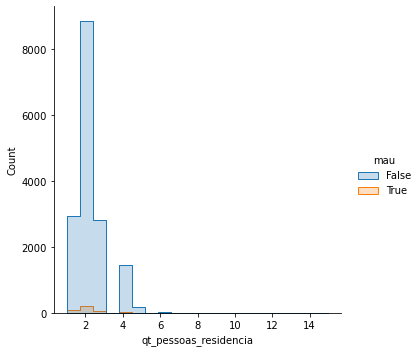

In [8]:
sns.displot(data = demo
            ,x = 'qt_pessoas_residencia'
            ,hue = 'mau'
            ,bins = 20
            ,element = 'step'
           )

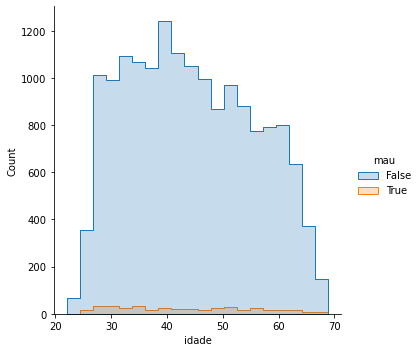

In [6]:
sns.displot(data = demo
            ,x = 'idade'
            ,hue = 'mau'
            ,bins = 20
            ,element = 'step'
           )

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [30]:
qtd_categorias = []

for variavel in metadados.index:
   qtd_categorias.append(df[variavel].nunique())

metadados['qtd_categorias'] = qtd_categorias
metadados



TypeError: 'builtin_function_or_method' object is not iterable

In [31]:
demo1 = demo.dtypes
demo1

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [14]:
demo2=pd.DataFrame(['sexo','posse_de_veiculo','posse_de_imovel','qtd_filhos','tipo_renda','educacao','estado_civil','tipo_residencia','idade','tempo_emprego','possui_celular','possui_fone_comercial','possui_fone','possui_email','qt_pessoas_residencia','mau'])
demo2

,0
0,sexo
1,posse_de_veiculo
2,posse_de_imovel
3,qtd_filhos
4,tipo_renda
5,educacao
6,estado_civil
7,tipo_residencia
8,idade
9,tempo_emprego


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [9]:
demo_encoded = pd.get_dummies(demo, columns=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil', 'tipo_residencia'], drop_first=True)
demo_encoded.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
demo_encoded.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                      uint8
posse_de_veiculo_Y                          uint8
posse_de_imovel_Y                           uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8


In [14]:
demo_encoded.mau = demo_encoded.mau.astype(int)

In [15]:
demo_encoded.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
sexo_M                                      uint8
posse_de_veiculo_Y                          uint8
posse_de_imovel_Y                           uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [31]:
relacao = pd.crosstab(demo['possui_email'], demo['mau'])
relacao

mau,False,True
possui_email,,
0,14810,360
1,1450,30


In [32]:
relacao = pd.crosstab(demo['posse_de_veiculo'], demo['mau'])
relacao

mau,False,True
posse_de_veiculo,,
N,9931,247
Y,6329,143


In [ ]:
# resposta: posse_de__veiculo é mais poderosa. Comparei 143 vs 30. Está correto?

#### 5) Salve a base, pois ela será utilizada no final deste módulo.